참고 : https://zero-ai.tistory.com/62

In [18]:
import torch

print(f"CUDA 사용 가능 여부: {torch.cuda.is_available()}")
print(f"GPU 이름: {torch.cuda.get_device_name(0)}")
print(f"CUDA 버전: {torch.version.cuda}")
print(f"PyTorch 버전: {torch.version}")
print(f"bf16 지원 여부: {torch.cuda.is_bf16_supported}")
print(torch.cuda.get_device_capability()[0] >= 8) # 8 이상이면 고성능 GPU

CUDA 사용 가능 여부: True
GPU 이름: NVIDIA GB10
CUDA 버전: 13.0
PyTorch 버전: <module 'torch.version' from '/home/vsc/LLM_TUNE/myenv/lib/python3.12/site-packages/torch/version.py'>
bf16 지원 여부: <function is_bf16_supported at 0xe23e5619be20>
True


In [2]:
import zipfile
import os
target_dir_list = ["./3.개방데이터/1.데이터/Training/02.라벨링데이터", "./3.개방데이터/1.데이터/Validation/02.라벨링데이터"]
extract_dir_list = ["./3.개방데이터/1.데이터/extract/Training/02.라벨링데이터", "./3.개방데이터/1.데이터/extract/Validation/02.라벨링데이터", "./3.개방데이터/1.데이터/raw/Training/0.1.원천데이터"]

if not os.path.exists(extract_dir_list[0]):
    os.makedirs(extract_dir_list[0])
if not os.path.exists(extract_dir_list[1]):
    os.makedirs(extract_dir_list[1])

for target_dir, extract_dir in zip(target_dir_list, extract_dir_list):
    for file in os.listdir(target_dir):
        if file.endswith(".zip"):
            file_path = os.path.join(target_dir, file)

            try :
                with zipfile.ZipFile(file_path, "r") as zip_ref:
                    zip_ref.extractall(extract_dir)
                    print(f"O : 성공 : {file}")
            except zipfile.BadZipFile :
                file_size = os.path.getsize(file_path)
                print(f"X : 실패 (파일 깨짐): {file} (크기: {file_size} bytes)")
            except Exception as e:
                print(f"기타 에러 ({file}): {e}")

O : 성공 : TL_10.개인정보.ICT.zip
O : 성공 : TL_05.행정.zip
X : 실패 (파일 깨짐): TL_01.민사.zip (크기: 18409624 bytes)
O : 성공 : TL_06.기업.zip
O : 성공 : TL_02.가사.zip
O : 성공 : TL_04.형사B(일반형).zip
O : 성공 : TL_08.특허.저작권.zip
O : 성공 : TL_07.근로자.zip
O : 성공 : TL_09.금융조세.zip
O : 성공 : TL_03.형사A(생활형).zip
O : 성공 : VL_02.가사.zip
O : 성공 : VL_10.개인정보.ICT.zip
O : 성공 : VL_07.근로자.zip
O : 성공 : VL_09.금융조세.zip
O : 성공 : VL_05.행정.zip
O : 성공 : VL_08.특허.저작권.zip
O : 성공 : VL_03.형사A(생활형).zip
O : 성공 : VL_01.민사.zip
O : 성공 : VL_04.형사B(일반형).zip
O : 성공 : VL_06.기업.zip


In [3]:
raw_dir_list = ["./3.개방데이터/1.데이터/Training/01.원천데이터"]

if not os.path.exists(raw_dir_list[0]):
    os.makedirs(raw_dir_list[0])

for file in os.listdir(raw_dir_list[0]):
    if file.endswith(".zip"):
        file_path = os.path.join(raw_dir_list[0], file)

        try :
            with zipfile.ZipFile(file_path, "r") as zip_ref:
                zip_ref.extractall(extract_dir_list[2])
                print(f"O : 성공 : {file}")
        except zipfile.BadZipFile :
            file_size = os.path.getsize(file_path)
            print(f"X : 실패 (파일 깨짐): {file} (크기: {file_size} bytes)")
    
        except Exception as e:
            print(f"기타 에러 ({file}): {e}")

O : 성공 : 01.원천데이터\TS_1.판례_10.개인정보.ICT.zip
O : 성공 : 01.원천데이터\TS_2.심결례_10.개인정보.ICT.zip
O : 성공 : 01.원천데이터\TS_2.심결례_06.기업.zip
O : 성공 : 01.원천데이터\TS_1.판례_05.행정.zip
O : 성공 : 01.원천데이터\TS_2.심결례_05.행정.zip
O : 성공 : 01.원천데이터\TS_2.심결례_09.금융조세.zip
O : 성공 : 01.원천데이터\TS_2.심결례_04.형사B(일반형).zip
O : 성공 : 01.원천데이터\TS_1.판례_02.가사.zip
O : 성공 : 01.원천데이터\TS_2.심결례_07.근로자.zip
O : 성공 : 01.원천데이터\TS_2.심결례_08.특허.저작권.zip
O : 성공 : 01.원천데이터\TS_1.판례_09.금융조세.zip
O : 성공 : 01.원천데이터\TS_1.판례_07.근로자.zip
O : 성공 : 01.원천데이터\TS_1.판례_08.특허.저작권.zip
O : 성공 : 01.원천데이터\TS_1.판례_03.형사A(생활형).zip
O : 성공 : 01.원천데이터\TS_2.심결례_01.민사.zip
O : 성공 : 01.원천데이터\TS_1.판례_06.기업.zip
O : 성공 : 01.원천데이터\TS_1.판례_04.형사B(일반형).zip
O : 성공 : 01.원천데이터\TS_1.판례_01.민사.zip


In [1]:
# 1. 데이터 셋 전처리

import json, os
from datasets import Dataset

def load_json_files(dir) :
    loaded_data = []
    for filename in os.listdir(dir) :
        if filename.endswith('.json') :
            with open(os.path.join(dir, filename), 'r', encoding='utf-8') as f :
                loaded_data.append(json.load(f))
    
    return loaded_data

def create_dataset(data) :
    dataset_dict = {
        "id": [],
        "question": [],
        "context": [],
        "summary": [],
        "answer" : [],
    }

    for item in data:
        dataset_dict["id"].append(item["info"]["id"])
        dataset_dict["question"].append(item["jdgmnInfo"][0]["question"])
        dataset_dict["context"].append(item["Summary"][0]["summ_contxt"])
        dataset_dict["summary"].append(item["Summary"][0]["summ_pass"])
        dataset_dict["answer"].append(item["jdgmnInfo"][0]["answer"])

    return Dataset.from_dict(dataset_dict)

In [2]:
extract_dir_list = ["./3.개방데이터/1.데이터/extract/Training/02.라벨링데이터", "./3.개방데이터/1.데이터/extract/Validation/02.라벨링데이터", "./3.개방데이터/1.데이터/raw/Training/0.1.원천데이터"]
train_data, val_data = load_json_files(extract_dir_list[0]), load_json_files(extract_dir_list[1])

In [3]:
# 처음에는 일부 데이터 셋으로 테스트
train_dataset = create_dataset(train_data)
val_dataset = create_dataset(val_data)

seed = 42

train_subset = train_dataset.shuffle(seed=seed).select(range(1000))
val_subset = val_dataset.shuffle(seed=seed).select(range(400))
test_subset = val_dataset.shuffle(seed=seed).select(range(401, 601))

print(f"{len(train_subset)} || {len(val_subset)} || {len(test_subset)}")

1000 || 400 || 200


In [4]:
# 2. 학습 시킬 모델 불러오기

from transformers import (
    AutoTokenizer, 
    AutoModelForCausalLM,
    BitsAndBytesConfig, 
    TrainingArguments,
)
from datasets import Dataset
import os, torch, json, wandb, subprocess
from sklearn.model_selection import train_test_split
import torch.nn as nn
from peft import (
    get_peft_model,
    LoraConfig, 
    TaskType,
    prepare_model_for_kbit_training
)

In [5]:
# 양자화 설정
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True, # 4bit 할 것이냐
    bnb_4bit_compute_dtype=torch.bfloat16, #bfloat16 or float16
    bnb_4bit_quant_type="nf4", # nf4 or fp4
)

In [6]:
# 모델 및 토크나이저 불러오기

model_id = "/home/vsc/LLM/model/EXAONE-3.5-7.8B-Instruct"
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.bfloat16,
    trust_remote_code=True,
    quantization_config=quantization_config,
    device_map="auto"
)
tokenizer = AutoTokenizer.from_pretrained(model_id)

print(model)

/home/vsc/LLM_TUNE/myenv/lib/python3.12/site-packages/torch/cuda/__init__.py:435: UserWarning: 
    Found GPU0 NVIDIA GB10 which is of cuda capability 12.1.
    Minimum and Maximum cuda capability supported by this version of PyTorch is
    (8.0) - (12.0)
    
  queued_call()


Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

ExaoneForCausalLM(
  (transformer): ExaoneModel(
    (wte): Embedding(102400, 4096, padding_idx=0)
    (drop): Dropout(p=0.0, inplace=False)
    (h): ModuleList(
      (0-31): 32 x ExaoneBlock(
        (ln_1): ExaoneRMSNorm()
        (attn): ExaoneAttention(
          (attention): ExaoneSdpaAttention(
            (rotary): ExaoneRotaryEmbedding()
            (k_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
            (v_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
            (q_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
            (out_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          )
        )
        (ln_2): ExaoneRMSNorm()
        (mlp): ExaoneGatedMLP(
          (c_fc_0): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (c_fc_1): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (c_proj): Linear4bit(in_features=14336, out_features=4096, bias=

In [7]:
# LoRA를 붙힐 레이어의 명칭을 찾아주는 코드

def find_all_linear_names(model):
    lora_module_names = set()
    for name, module in model.named_modules():
        if isinstance(module, nn.Linear):
            names = name.split('.')
            lora_module_names.add(names[0] if len(names) == 1 else names[-1])
    if 'lm_head' in lora_module_names:
        lora_module_names.remove('lm_head')
    return list(lora_module_names)
 
modules = find_all_linear_names(model)
print(modules)

['c_proj', 'c_fc_1', 'v_proj', 'c_fc_0', 'k_proj', 'q_proj', 'out_proj']


In [8]:
# 어떤 부분을 학습하냐에 따라서도 결과 값이 달라짐
modules = ["q_proj", "k_proj", "v_proj", "out_proj"]

# 변경 가능한 파라미터들
peft_config = LoraConfig(
    task_type="CAUSAL_LM", #CAUSAL_LM, FEATURE_EXTRACTION, QUESTION_ANS, SEQ_2_SEQ_LM, SEQ_CLS, TOKEN_CLS.
    inference_mode=False, # 학습 중에는 False로 두어야 가중치 업데이트 가능
    r=16, # r은 보통 2의 배수로 두는데, r이 클수록 학습 가능한 파라미터의 수가 더 많아짐
    lora_alpha=32,
    lora_dropout=0.05,
    target_modules=modules
)

print(peft_config)

LoraConfig(peft_type=<PeftType.LORA: 'LORA'>, auto_mapping=None, base_model_name_or_path=None, revision=None, task_type='CAUSAL_LM', inference_mode=False, r=16, target_modules={'v_proj', 'out_proj', 'k_proj', 'q_proj'}, lora_alpha=32, lora_dropout=0.05, fan_in_fan_out=False, bias='none', use_rslora=False, modules_to_save=None, init_lora_weights=True, layers_to_transform=None, layers_pattern=None, rank_pattern={}, alpha_pattern={}, megatron_config=None, megatron_core='megatron.core', loftq_config={}, use_dora=False, layer_replication=None, runtime_config=LoraRuntimeConfig(ephemeral_gpu_offload=False))


In [9]:
# 전체 파라미터 중 일부만 업데이트 되는 것을 확인할 수 있음

model = prepare_model_for_kbit_training(model)
model = get_peft_model(model, peft_config)
model.print_trainable_parameters()

trainable params: 13,631,488 || all params: 7,832,080,384 || trainable%: 0.1740


In [10]:
def generate_prompts(examples):
    prompt_list = []
    system_message = "당신은 법률 및 규정 관련 전문가입니다. 사용자의 질문에 대해 '긍정'및 '부정', '불명' 여부를 판단한 후, 그에 대한 구체적인 근거를 문맥(context)에서 추출해서 설명하세요."

    for i in range(len(examples['question'])):
        # 각 리스트에서 i번째 데이터를 추출합니다.
        answer = str(examples["answer"][i]).strip()
        question = examples["question"][i]
        context = examples["context"][i]
        summary = examples["summary"][i]

        # 사용자님의 정답 생성 로직
        if answer == "긍정":
            target_answer = f"네 그렇습니다! {summary}에 의하여 질문하신 내용은 옳습니다."
        elif answer == "부정":
            target_answer = f"아니요, 그렇지 않습니다! {summary}에 의하면 상충되는 내용이 있으므로 질문하신 내용은 옳지 않습니다."
        elif answer == "불명":
            target_answer = f"확실하지 않습니다만, {summary}에 적힌 내용을 근거로 판단해 볼 수 있을 것 같습니다."
        else:
            target_answer = f"해당 사안에 대해서는 제공된 근거({summary})를 바탕으로 판단이 필요합니다."

        # 채팅 템플릿 구성
        messages = [
            {"role": "system", "content": system_message},
            {"role": "user", "content": f"사용자의 질문인 {question}에 대해 {context}를 참조하여 3문단 이내로 답변하세요."},
            {"role": "assistant", "content": target_answer}
        ]

        full_prompt = tokenizer.apply_chat_template(
            messages, 
            tokenize=False, 
            add_generation_prompt=False
        )
        
        prompt_list.append(full_prompt)
    
    return prompt_list

In [13]:
print(generate_prompts(train_subset)[0])

[|system|]당신은 법률 및 규정 관련 전문가입니다. 사용자의 질문에 대해 '긍정'및 '부정', '불명' 여부를 판단한 후, 그에 대한 구체적인 근거를 문맥(context)에서 추출해서 설명하세요.[|endofturn|]
[|user|]사용자의 질문인 입찰에서 관련 시장은 각 입찰별로 특정 상품·용역에 대한 구매 물량·금액이 정해져 있고 해당 상품·용역은 낙찰사로 결정된 특정 사업자만이 공급을 담당하게 된다는 점에서 각 개별 입찰 건을 하나의 시장으로 보는 것이 타당한가?에 대해 <!--각주-->18) 입찰 시장은 각 입찰별로 특정 상품·용역에 대한 구매 물량·금액이 정해져 있고 해당 상품·용역은 낙찰사로 결정된 특정 사업자만이 공급을 담당하게 되므로, 입찰에서 관련시장은 각 개별 입찰 건을 하나의 시장으로 보는 것이 타당하다.
19) 피심인 한진의 석○○ 차장은 “적격심사제의 특성상 합의에 참여하지 않은 경쟁자들의 존재로 인해 낙찰은 담보되어 있지 않았지만, 최대한 협조사들을 동원하여 당사 판단 하에 낙찰 가능성이 가장 높은 투찰가격을 당사에게 배분하고 당사보다는 높은 가격이지만 그 다음으로 낙찰가능성이 있는 가격을 순차적으로 다른 들러리사에게 배분하여 투찰하도록 함으로써 당사의 낙찰 확률을 높일 목적으로 합의를 하였습니다.”라고 진술하였다(소갑 제7호증 참조).를 참조하여 3문단 이내로 답변하세요.
[|assistant|]네 그렇습니다! 입찰 시장은 각 입찰별로 특정 상품·용역에 대한 구매 물량·금액이 정해져 있고 해당 상품·용역은 낙찰사로 결정된 특정 사업자만이 공급을 담당하게 되므로, 입찰에서 관련시장은 각 개별 입찰 건을 하나의 시장으로 보는 것이 타당하다.에 의하여 질문하신 내용은 옳습니다.[|endofturn|]



In [18]:
# max_length 결정

def generate_prompts_test(example) :
    prompt_list = []
    system_message = "당신은 법률 및 규정 관련 전문가입니다. 사용자의 질문에 대해 '긍정' 및 '부정', 혹은 '불명' 여부를 판단한 후, 그에 대한 구체적인 근거를 문맥(context)에서 추출해서 설명하세요."

    answer = str(example["answer"]).strip()
    question = example["question"]
    context = example["context"]
    summary = example["summary"]

    if answer == "긍정" :
        target_answer = f"네 그렇습니다! {summary}에 의하여 질문하신 내용은 옳습니다."
    elif answer == "부정" :
        target_answer = f"아니요, 그렇지 않습니다! {summary}에 의하면 상충되는 내용이 있으므로 질문하신 내용은 옳지 않습니다."
    elif answer == "불명" :
        target_answer = f"확실하지 않습니다만, {summary}에 적힌 내용을 근거로 판단해 볼 수 있을 것 같습니다."
    else :
        target_answer = f"해당 사안에 대해서는 제공된 근거({summary})를 바탕으로 판단이 필요합니다."
    messages = [
        {"role": "system", "content": system_message},
        {"role": "user", "content": f"사용자의 질문인 {question}에 대해 {context}를 참조하여 3문단 이내로 답변하세요."},
        {"role": "assistant", "content": target_answer}
    ]

    full_prompt = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=False)
    
    return {"text": full_prompt}

train_prompts, val_prompts = train_subset.map(generate_prompts_test), val_subset.map(generate_prompts_test)
print(train_prompts[0])

import numpy as np

token_lengths = [len(tokenizer.encode(p["text"])) for p in train_prompts] + [len(tokenizer.encode(p["text"])) for p in val_prompts]

print(f"최대 토큰 길이: {np.max(token_lengths)}")
print(f"평균 토큰 길이: {np.mean(token_lengths):.2f}")
print(f"95번째 백분위수 (P95): {np.percentile(token_lengths, 95)}") # 95번째로 큰 데이터의 토큰 수
print(f"99번째 백분위수 (P99): {np.percentile(token_lengths, 99)}") # 99번째로 큰 데이터의 토큰 수

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

{'id': 41000982, 'question': '입찰에서 관련 시장은 각 입찰별로 특정 상품·용역에 대한 구매 물량·금액이 정해져 있고 해당 상품·용역은 낙찰사로 결정된 특정 사업자만이 공급을 담당하게 된다는 점에서 각 개별 입찰 건을 하나의 시장으로 보는 것이 타당한가?', 'context': '<!--각주-->18) 입찰 시장은 각 입찰별로 특정 상품·용역에 대한 구매 물량·금액이 정해져 있고 해당 상품·용역은 낙찰사로 결정된 특정 사업자만이 공급을 담당하게 되므로, 입찰에서 관련시장은 각 개별 입찰 건을 하나의 시장으로 보는 것이 타당하다.\n19) 피심인 한진의 석○○ 차장은 “적격심사제의 특성상 합의에 참여하지 않은 경쟁자들의 존재로 인해 낙찰은 담보되어 있지 않았지만, 최대한 협조사들을 동원하여 당사 판단 하에 낙찰 가능성이 가장 높은 투찰가격을 당사에게 배분하고 당사보다는 높은 가격이지만 그 다음으로 낙찰가능성이 있는 가격을 순차적으로 다른 들러리사에게 배분하여 투찰하도록 함으로써 당사의 낙찰 확률을 높일 목적으로 합의를 하였습니다.”라고 진술하였다(소갑 제7호증 참조).', 'summary': '입찰 시장은 각 입찰별로 특정 상품·용역에 대한 구매 물량·금액이 정해져 있고 해당 상품·용역은 낙찰사로 결정된 특정 사업자만이 공급을 담당하게 되므로, 입찰에서 관련시장은 각 개별 입찰 건을 하나의 시장으로 보는 것이 타당하다.', 'answer': '긍정', 'text': "[|system|]당신은 법률 및 규정 관련 전문가입니다. 사용자의 질문에 대해 '긍정' 및 '부정', 혹은 '불명' 여부를 판단한 후, 그에 대한 구체적인 근거를 문맥(context)에서 추출해서 설명하세요.[|endofturn|]\n[|user|]사용자의 질문인 입찰에서 관련 시장은 각 입찰별로 특정 상품·용역에 대한 구매 물량·금액이 정해져 있고 해당 상품·용역은 낙찰사로 결정된 특정 사업자만이 공급을 담당하게 된다는 점에서 각 개별 입찰 건을 하나의 시장으로 보는 것이

In [16]:
# 학습을 기록할 wanDB notebook 설정

import os
from datetime import datetime

wandb.finish()

os.environ["WANDB_PROJECT"] = "PromptTuning" # 프로젝트 이름
os.environ["WANDB_RUN_ID"] = "legal_testv4" # 노트북 고유 ID
os.environ["WANDB_RESUME"] = "allow" # 해당 노트북에서 학습을 이어서 진행할 것인지

wandb.init(
    project=os.environ["WANDB_PROJECT"],
    id=os.environ["WANDB_RUN_ID"],
    resume=os.environ["WANDB_RESUME"],
    name=datetime.now().strftime("%Y-%m-%d %H:%M:%S") # 대시보드에 표시될 이름
)

wandb: [wandb.login()] Loaded credentials for https://api.wandb.ai from /home/vsc/.netrc.
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin


In [17]:
# 먼저 1 epoch로 훈련 -> 추론이 잘 이루어지는지 확인
# 이후 epoch를 늘려 과적합이 일어날 때 까지 학습하는 것이 좋음

from trl import SFTTrainer, SFTConfig
from datetime import datetime

training_args = SFTConfig(
    output_dir="./SFT",
    save_strategy="steps",
    save_steps=50,
    eval_strategy="steps",
    eval_steps=50,
    max_seq_length=1024,
    num_train_epochs=10,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    gradient_accumulation_steps=8,
    load_best_model_at_end=True,
    optim="paged_adamw_32bit",
    logging_dir="./logs",
    logging_steps=11,
    warmup_steps=1,
    logging_strategy="steps",
    learning_rate=5e-5,
    group_by_length=True,
    bf16=True,
    fp16=False,
    report_to="wandb",
    run_name=f"{datetime.now().strftime("%Y-%m-%d %H:%M:%S")}"
)

trainer = SFTTrainer(
    model=model,
    train_dataset=train_subset,
    eval_dataset=val_subset,
    args=training_args,
    formatting_func=generate_prompts,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)] # 3번 연속으로 성적이 나쁘면 중단
)

Generating train split: 0 examples [00:00, ? examples/s]

ValueError: Error occurred while packing the dataset. Make sure that your dataset has enough samples to at least yield one packed sequence.

In [15]:
final_save_path = "./SFT/final"
trainer.train()
# trainer.train(resume_from_checkpoint=True) # 이어서 학습을 진행하고 싶은 경우, 가장 마지막 checkpoint-XX를 불러와서 학습이 진행된다

trainer.save_model(final_save_path)
tokenizer.save_pretrained(final_save_path)
wandb.finish()

`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...
/home/vsc/LLM_TUNE/myenv/lib/python3.12/site-packages/torch/_dynamo/eval_frame.py:1181: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_reentrant will raise an exception. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


Step,Training Loss,Validation Loss
50,1.186900,1.046735
100,0.962100,0.953926
150,0.912000,0.929190
200,0.913100,0.914811
250,0.872100,0.906348
300,0.842000,0.903418
350,0.877800,0.901169
400,0.798000,0.900246
450,0.806900,0.899870
500,0.791700,0.900180


We detected that you are passing `past_key_values` as a tuple and this is deprecated and will be removed in v4.43. Please use an appropriate `Cache` class (https://huggingface.co/docs/transformers/v4.41.3/en/internal/generation_utils#transformers.Cache)
/home/vsc/LLM_TUNE/myenv/lib/python3.12/site-packages/torch/_dynamo/eval_frame.py:1181: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_reentrant will raise an exception. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/home/vsc/LLM_TUNE/myenv/lib/python3.12/site-packages/torch/_dynamo/eval_frame.py:1181: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_ree

eval/loss,█▄▂▂▁▁▁▁▁▁▁▁
eval/runtime,▅▄▅▄▅▅▂▄▁▃▃█
eval/samples_per_second,▄▄▄▄▄▄▆▆█▆▆▁
eval/steps_per_second,██▁█▁██████▁
train/epoch,▁▁▂▂▂▂▂▂▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇████
train/global_step,▁▁▁▁▂▂▂▂▂▂▃▃▃▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▇▇▇▇▇▇▇▇████
train/grad_norm,█▃▂▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▃
train/learning_rate,███▇▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▁▁
train/loss,█▆▄▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
eval/loss,0.90151
eval/runtime,127.8985


In [1]:
# 3. 추론된 모델 확인
# 중요!!! 학습 이후 커널을 내리고 다시 올려야 파인튜닝된 가중치를 모델에 올릴 수 있음

In [1]:
from transformers import (
    AutoTokenizer, 
    AutoModelForCausalLM,
    BitsAndBytesConfig, 
    TrainingArguments,
)
from datasets import Dataset
import os, torch, json, wandb, subprocess
from sklearn.model_selection import train_test_split
import torch.nn as nn
from peft import (
    get_peft_model,
    LoraConfig, 
    TaskType,
    prepare_model_for_kbit_training
)

In [2]:
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True, # 4bit 할 것이냐
    bnb_4bit_compute_dtype=torch.bfloat16, #bfloat16 or float16
    bnb_4bit_quant_type="nf4", # nf4 or fp4
)

In [3]:
# 모델 및 토크나이저 불러오기

from peft import PeftModel

model_id = "/home/vsc/LLM/model/EXAONE-3.5-7.8B-Instruct"

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.bfloat16,
    trust_remote_code=True,
    quantization_config=quantization_config,
    device_map="auto"
)

# model.eval()

/home/vsc/LLM_TUNE/myenv/lib/python3.12/site-packages/torch/cuda/__init__.py:435: UserWarning: 
    Found GPU0 NVIDIA GB10 which is of cuda capability 12.1.
    Minimum and Maximum cuda capability supported by this version of PyTorch is
    (8.0) - (12.0)
    
  queued_call()


Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

In [4]:
adapter_path = "./SFT/final"
model = PeftModel.from_pretrained(model, adapter_path) # 학습된 LoRA Config를 씌운다
model.eval() # 추론 모드로 모델을 바꾼다

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): ExaoneForCausalLM(
      (transformer): ExaoneModel(
        (wte): Embedding(102400, 4096, padding_idx=0)
        (drop): Dropout(p=0.0, inplace=False)
        (h): ModuleList(
          (0-31): 32 x ExaoneBlock(
            (ln_1): ExaoneRMSNorm()
            (attn): ExaoneAttention(
              (attention): ExaoneSdpaAttention(
                (rotary): ExaoneRotaryEmbedding()
                (k_proj): lora.Linear4bit(
                  (base_layer): Linear4bit(in_features=4096, out_features=1024, bias=False)
                  (lora_dropout): ModuleDict(
                    (default): Dropout(p=0.05, inplace=False)
                  )
                  (lora_A): ModuleDict(
                    (default): Linear(in_features=4096, out_features=16, bias=False)
                  )
                  (lora_B): ModuleDict(
                    (default): Linear(in_features=16, out_features=1024, bias=False)
                  )


In [5]:
import json, os
from datasets import Dataset

def load_json_files(dir) :
    loaded_data = []
    for filename in os.listdir(dir) :
        if filename.endswith('.json') :
            with open(os.path.join(dir, filename), 'r', encoding='utf-8') as f :
                loaded_data.append(json.load(f))
    
    return loaded_data

def create_dataset(data) :
    dataset_dict = {
        "id": [],
        "question": [],
        "context": [],
        "summary": [],
        "answer" : [],
    }

    for item in data:
        dataset_dict["id"].append(item["info"]["id"])
        dataset_dict["question"].append(item["jdgmnInfo"][0]["question"])
        dataset_dict["context"].append(item["Summary"][0]["summ_contxt"])
        dataset_dict["summary"].append(item["Summary"][0]["summ_pass"])
        dataset_dict["answer"].append(item["jdgmnInfo"][0]["answer"])

    return Dataset.from_dict(dataset_dict)
    
extract_dir_list = ["./3.개방데이터/1.데이터/extract/Training/02.라벨링데이터", "./3.개방데이터/1.데이터/extract/Validation/02.라벨링데이터", "./3.개방데이터/1.데이터/raw/Training/0.1.원천데이터"]
train_data, val_data = load_json_files(extract_dir_list[0]), load_json_files(extract_dir_list[1])

train_dataset = create_dataset(train_data)
val_dataset = create_dataset(val_data)

seed = 42

train_subset = train_dataset.shuffle(seed=seed).select(range(1000))
val_subset = val_dataset.shuffle(seed=seed).select(range(400))
test_subset = val_dataset.shuffle(seed=seed).select(range(401, 601))

print(f"{len(train_subset)} || {len(val_subset)} || {len(test_subset)}")

1000 || 400 || 200


In [6]:
def generate_legal_answer(question):
    system_message = "당신은 법률 및 규정 관련 전문가입니다. 사용자의 질문에 대해 '긍정'및 '부정', '불명' 여부를 판단한 후, 그에 대한 구체적인 근거를 문맥(context)에서 추출해서 설명하세요."
    
    # 학습 시 사용한 유저 프롬프트: "사용자의 질문인 {question}에 대해 {context}를 참조하여 3문단 이내로 답변하세요."
    user_content = f"사용자의 질문인 {question}에 대해 3문단 이내로 답변하세요."

    messages = [
        {"role": "system", "content": system_message},
        {"role": "user", "content": user_content},
    ]

    input_ids = tokenizer.apply_chat_template(
        messages,
        add_generation_prompt=True,
        return_tensors="pt",
    ).to(model.device)

    with torch.no_grad():
        outputs = model.generate(
            input_ids,
            max_new_tokens=1024,
            do_sample=False, 
            repetition_penalty=1.1,
            eos_token_id=tokenizer.eos_token_id,
            pad_token_id=tokenizer.pad_token_id,
        )

    response = tokenizer.decode(outputs[0][input_ids.shape[-1]:], skip_special_tokens=True)
    return response.strip()

검증 및 비교 시작... 총 200개 데이터


Evaluating: 100%|████████████████████████████████████████████████████████| 200/200 [16:42<00:00,  5.01s/it]


[최종 검증 요약]
- Label Accuracy: 71.00%
- ROUGE-L: 0.0856
- BLEU: 0.1632

[상세 분류 리포트]
              precision    recall  f1-score   support

          긍정       0.80      0.72      0.76       119
          부정       0.60      0.76      0.67        74
          불명       0.00      0.00      0.00         7
          실패       0.00      0.00      0.00         0

    accuracy                           0.71       200
   macro avg       0.35      0.37      0.36       200
weighted avg       0.70      0.71      0.70       200

검증 완료! 로그 파일: ./result/log_without_context.txt



/home/vsc/LLM_TUNE/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/vsc/LLM_TUNE/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/vsc/LLM_TUNE/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape

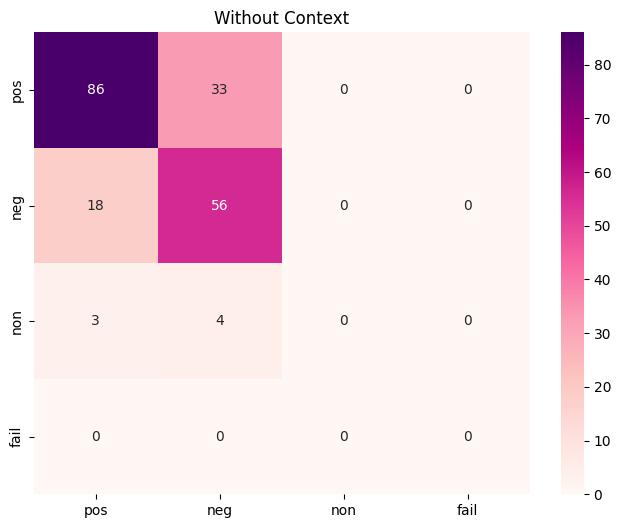

In [7]:
# 유저가 Context를 주지 않을 경우

import os
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from difflib import SequenceMatcher # 텍스트간 유사도 측정 라이브러리
from sklearn.metrics import confusion_matrix, classification_report
import evaluate  # Hugging Face evaluate 라이브러리

# 1. 지표 로더
rouge_metric = evaluate.load("rouge")
bleu_metric = evaluate.load("bleu")

# 2. 결과 파일 및 통계 초기화
output_file_path = "./result/log_without_context.txt"
os.makedirs("./result", exist_ok=True)

all_preds_text = []    # ROUGE/BLEU용 모델 답변
all_refs_text = []     # ROUGE/BLEU용 실제 정답
y_true_idx = []        # 혼동행렬용 실제 라벨
y_pred_idx = []        # 혼동행렬용 예측 라벨

label_map = {"긍정": 0, "부정": 1, "불명": 2}
correct_labels = 0
total_samples = len(test_subset)

print(f"검증 및 비교 시작... 총 {total_samples}개 데이터")

with open(output_file_path, "w", encoding="utf-8") as f:
    f.write("=== EXAONE 법률 QA 정답 비교 검증 로그 ===\n\n")

    for i, data in enumerate(tqdm(test_subset, desc="Evaluating")):
        question = data["question"]
        context = data["context"]
        actual_label = str(data["answer"]).strip() # 실제 정답 (긍정/부정/불명)
        summary = data["summary"]
        
        if actual_label == "긍정":
            ground_truth = f"네 그렇습니다! {summary}에 의하여 질문하신 내용은 옳습니다."
        elif actual_label == "부정":
            ground_truth = f"아니요, 그렇지 않습니다! {summary}에 의하면 상충되는 내용이 있으므로 질문하신 내용은 옳지 않습니다."
        else:
            ground_truth = f"확실하지 않습니다만, {summary}에 적힌 내용을 근거로 판단해 볼 수 있을 것 같습니다."

        # 모델 답변 생성
        generated_answer = generate_legal_answer(question)

        actual_idx = label_map.get(actual_label, 3)
        if "네" in generated_answer[:10]: pred_idx = 0
        elif "아니요" in generated_answer[:10]: pred_idx = 1
        elif "확실하지" in generated_answer[:10]: pred_idx = 2
        else: pred_idx = 3 # 분류 실패

        y_true_idx.append(actual_idx)
        y_pred_idx.append(pred_idx)
        if actual_idx == pred_idx: correct_labels += 1

        all_preds_text.append(generated_answer)
        all_refs_text.append(ground_truth)

        similarity = SequenceMatcher(None, ground_truth, generated_answer).ratio()

        # 로그 기록
        f.write(f"[{i+1}번 데이터] | Label 일치: {'O' if actual_idx == pred_idx else 'X'} | 유사도: {similarity:.2f}\n")
        f.write(f"질문: {question}\n")
        f.write(f"실제 정답: {ground_truth}\n")
        f.write(f"모델 답변: {generated_answer}\n")
        f.write("-" * 80 + "\n")

    rouge_results = rouge_metric.compute(predictions=all_preds_text, references=all_refs_text)
    bleu_results = bleu_metric.compute(predictions=all_preds_text, references=all_refs_text)

    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_true_idx, y_pred_idx, labels=[0, 1, 2, 3])
    sns.heatmap(cm, annot=True, fmt='d', cmap='RdPu', 
                xticklabels=["pos", "neg", "non", "fail"], 
                yticklabels=["pos", "neg", "non", "fail"])
    plt.title("Without Context")
    plt.savefig("./result/confusion_matrix_without_context.png")

    # 5. 최종 통계 기록
    accuracy = (correct_labels / total_samples) * 100
    report = classification_report(y_true_idx, y_pred_idx, 
                                   target_names=['긍정', '부정', '불명', '실패'], labels=[0, 1, 2, 3])
    summary_msg = (
        f"\n[최종 검증 요약]\n"
        f"- Label Accuracy: {accuracy:.2f}%\n"
        f"- ROUGE-L: {rouge_results['rougeL']:.4f}\n"
        f"- BLEU: {bleu_results['bleu']:.4f}\n"
        f"\n[상세 분류 리포트]\n{report}"
    )
    
    print(summary_msg)
    f.write(summary_msg)

print(f"검증 완료! 로그 파일: {output_file_path}")

In [8]:
def generate_legal_answer_with_context(question, context):
    # 학습 시와 동일한 system_message
    system_message = "당신은 법률 및 규정 관련 전문가입니다. 사용자의 질문에 대해 '긍정'및 '부정', '불명' 여부를 판단한 후, 그에 대한 구체적인 근거를 문맥(context)에서 추출해서 설명하세요."
    
    # 학습 시의 user content와 완벽히 일치 (조사, 띄어쓰기 포함)
    user_content = f"사용자의 질문인 {question}에 대해 {context}를 참조하여 3문단 이내로 답변하세요."

    messages = [
        {"role": "system", "content": system_message},
        {"role": "user", "content": user_content},
    ]

    input_ids = tokenizer.apply_chat_template(
        messages,
        add_generation_prompt=True,
        return_tensors="pt",
    ).to(model.device)

    with torch.no_grad():
        outputs = model.generate(
            input_ids,
            max_new_tokens=1024,
            do_sample=False,
            repetition_penalty=1.1,
            eos_token_id=tokenizer.eos_token_id,
            pad_token_id=tokenizer.pad_token_id,
        )

    response = tokenizer.decode(outputs[0][input_ids.shape[-1]:], skip_special_tokens=True)
    return response.strip()
    return response

검증 및 비교 시작... 총 200개 데이터


Evaluating: 100%|███████████████████████████████████████████████████| 200/200 [15:12<00:00,  4.56s/it]


[최종 검증 요약]
- Label Accuracy: 88.50%
- ROUGE-L: 0.1913
- BLEU: 0.4310

[상세 분류 리포트]
              precision    recall  f1-score   support

          긍정       0.90      0.93      0.92       119
          부정       0.86      0.89      0.87        74
          불명       0.00      0.00      0.00         7
          실패       0.00      0.00      0.00         0

    accuracy                           0.89       200
   macro avg       0.44      0.46      0.45       200
weighted avg       0.85      0.89      0.87       200

검증 완료! 로그 파일: ./result/log_with_context.txt



/home/vsc/LLM_TUNE/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/vsc/LLM_TUNE/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/vsc/LLM_TUNE/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape

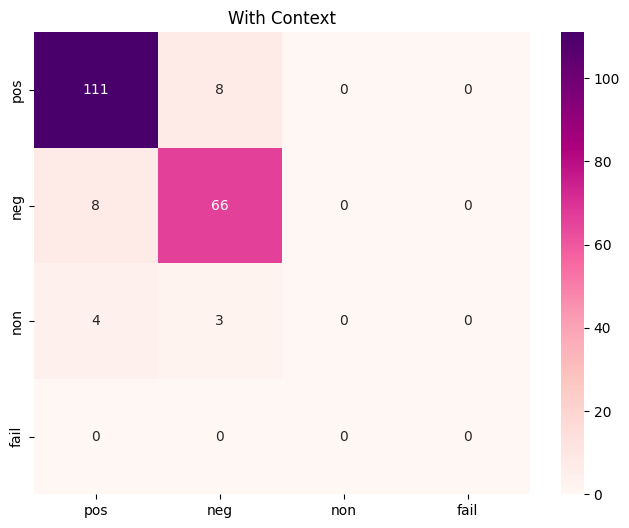

In [9]:
# 유저가 Context를 주는 경우

import os
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from difflib import SequenceMatcher # 텍스트간 유사도 측정 라이브러리
from sklearn.metrics import confusion_matrix, classification_report
import evaluate  # Hugging Face evaluate 라이브러리

# 1. 지표 로더
rouge_metric = evaluate.load("rouge")
bleu_metric = evaluate.load("bleu")

# 2. 결과 파일 및 통계 초기화
output_file_path = "./result/log_with_context.txt"
os.makedirs("./result", exist_ok=True)

all_preds_text = []    # ROUGE/BLEU용 모델 답변
all_refs_text = []     # ROUGE/BLEU용 실제 정답
y_true_idx = []        # 혼동행렬용 실제 라벨
y_pred_idx = []        # 혼동행렬용 예측 라벨

label_map = {"긍정": 0, "부정": 1, "불명": 2}
correct_labels = 0
total_samples = len(test_subset)

print(f"검증 및 비교 시작... 총 {total_samples}개 데이터")

with open(output_file_path, "w", encoding="utf-8") as f:
    f.write("=== EXAONE 법률 QA 정답 비교 검증 로그 ===\n\n")

    for i, data in enumerate(tqdm(test_subset, desc="Evaluating")):
        question = data["question"]
        context = data["context"]
        actual_label = str(data["answer"]).strip() # 실제 정답 (긍정/부정/불명)
        summary = data["summary"]
        
        if actual_label == "긍정":
            ground_truth = f"네 그렇습니다! {summary}에 의하여 질문하신 내용은 옳습니다."
        elif actual_label == "부정":
            ground_truth = f"아니요, 그렇지 않습니다! {summary}에 의하면 상충되는 내용이 있으므로 질문하신 내용은 옳지 않습니다."
        else:
            ground_truth = f"확실하지 않습니다만, {summary}에 적힌 내용을 근거로 판단해 볼 수 있을 것 같습니다."

        # 모델 답변 생성
        generated_answer = generate_legal_answer_with_context(question, context)

        actual_idx = label_map.get(actual_label, 3)
        if "네" in generated_answer[:10]: pred_idx = 0
        elif "아니요" in generated_answer[:10]: pred_idx = 1
        elif "확실하지" in generated_answer[:10]: pred_idx = 2
        else: pred_idx = 3 # 분류 실패

        y_true_idx.append(actual_idx)
        y_pred_idx.append(pred_idx)
        if actual_idx == pred_idx: correct_labels += 1

        all_preds_text.append(generated_answer)
        all_refs_text.append(ground_truth)

        similarity = SequenceMatcher(None, ground_truth, generated_answer).ratio()

        # 로그 기록
        f.write(f"[{i+1}번 데이터] | Label 일치: {'O' if actual_idx == pred_idx else 'X'} | 유사도: {similarity:.2f}\n")
        f.write(f"질문: {question}\n")
        f.write(f"실제 정답: {ground_truth}\n")
        f.write(f"모델 답변: {generated_answer}\n")
        f.write("-" * 80 + "\n")

    rouge_results = rouge_metric.compute(predictions=all_preds_text, references=all_refs_text)
    bleu_results = bleu_metric.compute(predictions=all_preds_text, references=all_refs_text)

    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_true_idx, y_pred_idx, labels=[0, 1, 2, 3])
    sns.heatmap(cm, annot=True, fmt='d', cmap='RdPu', 
                xticklabels=["pos", "neg", "non", "fail"], 
                yticklabels=["pos", "neg", "non", "fail"])
    plt.title("With Context")
    plt.savefig("./result/confusion_matrix_with_context.png")

    # 5. 최종 통계 기록
    accuracy = (correct_labels / total_samples) * 100
    report = classification_report(y_true_idx, y_pred_idx, 
                                   target_names=['긍정', '부정', '불명', '실패'], labels=[0, 1, 2, 3])
    summary_msg = (
        f"\n[최종 검증 요약]\n"
        f"- Label Accuracy: {accuracy:.2f}%\n"
        f"- ROUGE-L: {rouge_results['rougeL']:.4f}\n"
        f"- BLEU: {bleu_results['bleu']:.4f}\n"
        f"\n[상세 분류 리포트]\n{report}"
    )
    
    print(summary_msg)
    f.write(summary_msg)

print(f"검증 완료! 로그 파일: {output_file_path}")

In [10]:
import re

def count_instruction_leakage(file_path):    
    leakage_count = 0
    total_answers = 0
    
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            content = f.read()
            
            # '모델 답변:' 이후부터 다음 구분선(---) 혹은 파일 끝까지의 텍스트를 추출
            model_answers = re.findall(r"모델 답변:\s*(.*?)(?=\n-{10,}|\n===|\Z)", content, re.DOTALL)
            
            total_answers = len(model_answers)
            
            for answer in model_answers:
                # 앞뒤 공백 제거 후 타겟 문구로 끝나는지 확인
                clean_answer = answer.strip()
                if re.search(r"를 참조하여 \d+문단 이내로 답변하세요\.\s*$", clean_answer):
                    leakage_count += 1
                    
        print(f"📊 검증 결과 리포트")
        print(f"----------------------")
        print(f"✅ 전체 모델 답변 수: {total_answers}개")
        print(f"⚠️ 지시 사항 누수 발생: {leakage_count}개")
        
        if total_answers > 0:
            leakage_rate = (leakage_count / total_answers) * 100
            print(f"📈 누수 발생률: {leakage_rate:.2f}%")
            
    except FileNotFoundError:
        print(f"❌ 파일을 찾을 수 없습니다: {file_path}")

# 파일 경로를 넣고 실행하세요
count_instruction_leakage("./result/log_without_context.txt")
print()
count_instruction_leakage("./result/log_with_context.txt")

📊 검증 결과 리포트
----------------------
✅ 전체 모델 답변 수: 200개
⚠️ 지시 사항 누수 발생: 65개
📈 누수 발생률: 32.50%

📊 검증 결과 리포트
----------------------
✅ 전체 모델 답변 수: 200개
⚠️ 지시 사항 누수 발생: 0개
📈 누수 발생률: 0.00%


In [ ]:
# HuggingFace에 Model, Tokenizer 및 LoRA 가중치 load / unload

In [2]:
# LoRA 가중치만 upload
from peft import PeftModel
from transformers import (
    AutoTokenizer, 
    AutoModelForCausalLM,
    BitsAndBytesConfig, 
    TrainingArguments,
)
import torch

model_id = "/home/vsc/LLM/model/EXAONE-3.5-7.8B-Instruct"
tokenizer = AutoTokenizer.from_pretrained(model_id)

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True, # 4bit 할 것이냐
    bnb_4bit_compute_dtype=torch.bfloat16, #bfloat16 or float16
    bnb_4bit_quant_type="nf4", # nf4 or fp4
)

model = AutoModelForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.bfloat16,
    trust_remote_code=True,
    quantization_config=quantization_config,
    device_map="auto"
)

# 1. 학습 완료 후 저장된 어댑터 경로
adapter_path = "/home/vsc/LLM_TUNE/115.법률-규정 텍스트 분석 데이터_고도화_상황에 따른 판례 데이터/SFT/final"
repo_id = "JungSeong2/QA-Law-Adapter" # 허깅페이스 저장소 이름

# 2. 토크나이저와 어댑터 모델 로드 (또는 학습 중인 trainer.model 사용)
tokenizer = AutoTokenizer.from_pretrained(adapter_path)
model = PeftModel.from_pretrained(model, adapter_path)

# 3. 어댑터 가중치만 업로드
model.push_to_hub(
    repo_id=repo_id,
    commit_message="v1.0: First FineTuned",
    revision="v1.0" # v1.0 브랜치에 해당 어댑터를 업로드
)

tokenizer.push_to_hub(
    repo_id,
    commit_message="v1.0: 토크나이저 설정 업로드",
    revision="v1.0"
)

/home/vsc/LLM_TUNE/myenv/lib/python3.12/site-packages/torch/cuda/__init__.py:435: UserWarning: 
    Found GPU0 NVIDIA GB10 which is of cuda capability 12.1.
    Minimum and Maximum cuda capability supported by this version of PyTorch is
    (8.0) - (12.0)
    
  queued_call()


Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

Processing Files (0 / 0): |          |  0.00B /  0.00B            

New Data Upload: |          |  0.00B /  0.00B            

No files have been modified since last commit. Skipping to prevent empty commit.


CommitInfo(commit_url='https://huggingface.co/JungSeong2/QA-Law-Adapter/commit/b9e87128a6b8196943b8bd1541a4249f33c072ab', commit_message='v1.0: 토크나이저 설정 업로드', commit_description='', oid='b9e87128a6b8196943b8bd1541a4249f33c072ab', pr_url=None, repo_url=RepoUrl('https://huggingface.co/JungSeong2/QA-Law-Adapter', endpoint='https://huggingface.co', repo_type='model', repo_id='JungSeong2/QA-Law-Adapter'), pr_revision=None, pr_num=None)

In [3]:
print(tokenizer.chat_template)

{% for message in messages %}{% if loop.first and message['role'] != 'system' %}{{ '[|system|][|endofturn|]
' }}{% endif %}{{ '[|' + message['role'] + '|]' + message['content'] }}{% if message['role'] == 'user' %}{{ '
' }}{% else %}{{ '[|endofturn|]
' }}{% endif %}{% endfor %}{% if add_generation_prompt %}{{ '[|assistant|]' }}{% endif %}


In [5]:
# 업로드한 모델 불러오기
model_id = "/home/vsc/LLM/model/EXAONE-3.5-7.8B-Instruct"
tokenizer = AutoTokenizer.from_pretrained(model_id)

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True, # 4bit 할 것이냐
    bnb_4bit_compute_dtype=torch.bfloat16, #bfloat16 or float16
    bnb_4bit_quant_type="nf4", # nf4 or fp4
)

model = AutoModelForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.bfloat16,
    trust_remote_code=True,
    quantization_config=quantization_config,
    device_map="auto"
)

repo_id = "JungSeong2/QA-Law-Adapter"
model = PeftModel.from_pretrained(
    model, 
    repo_id, 
    revision="v1.0"
)

Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

adapter_config.json:   0%|          | 0.00/700 [00:00<?, ?B/s]

adapter_model.safetensors:   0%|          | 0.00/54.6M [00:00<?, ?B/s]

In [6]:
print(model)

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): ExaoneForCausalLM(
      (transformer): ExaoneModel(
        (wte): Embedding(102400, 4096, padding_idx=0)
        (drop): Dropout(p=0.0, inplace=False)
        (h): ModuleList(
          (0-31): 32 x ExaoneBlock(
            (ln_1): ExaoneRMSNorm()
            (attn): ExaoneAttention(
              (attention): ExaoneSdpaAttention(
                (rotary): ExaoneRotaryEmbedding()
                (k_proj): lora.Linear4bit(
                  (base_layer): Linear4bit(in_features=4096, out_features=1024, bias=False)
                  (lora_dropout): ModuleDict(
                    (default): Dropout(p=0.05, inplace=False)
                  )
                  (lora_A): ModuleDict(
                    (default): Linear(in_features=4096, out_features=16, bias=False)
                  )
                  (lora_B): ModuleDict(
                    (default): Linear(in_features=16, out_features=1024, bias=False)
                  )


In [21]:
# 학습된 LoRA 가중치를 모델에 합친 채로 배포하고 싶을 경우 (파인튜닝이 끝났을 때)

from peft import PeftModel
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

model_id = "/home/vsc/LLM/model/EXAONE-3.5-7.8B-Instruct"

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True, # 4bit 할 것이냐
    bnb_4bit_compute_dtype=torch.bfloat16, #bfloat16 or float16
    bnb_4bit_quant_type="nf4", # nf4 or fp4
)

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.bfloat16,
    trust_remote_code=True,
    quantization_config=quantization_config,
    device_map="auto"
)

adapter_path = "/home/vsc/LLM_TUNE/115.법률-규정 텍스트 분석 데이터_고도화_상황에 따른 판례 데이터/SFT/final"
model = PeftModel.from_pretrained(model, adapter_path)

merged_model = model.merge_and_unload()

repo_id = "JungSeong2/QA_Law_Test"
merged_model.push_to_hub(repo_id)
tokenizer.push_to_hub(repo_id)

Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

Processing Files (0 / 0): |          |  0.00B /  0.00B            

New Data Upload: |          |  0.00B /  0.00B            

README.md:   0%|          | 0.00/5.17k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/JungSeong2/QA_Law_Test/commit/0eece6eab2e65b6efbce93dffbf72d7b81659873', commit_message='Upload tokenizer', commit_description='', oid='0eece6eab2e65b6efbce93dffbf72d7b81659873', pr_url=None, repo_url=RepoUrl('https://huggingface.co/JungSeong2/QA_Law_Test', endpoint='https://huggingface.co', repo_type='model', repo_id='JungSeong2/QA_Law_Test'), pr_revision=None, pr_num=None)